In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Importing the dataset
eng_data=pd.read_csv('CONcreTEXT_trial_EN.tsv',sep='\t')
eng_data

,TARGET,POS,INDEX,TEXT,MEAN
0,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06
1,achievement,N,9,"Please list people you have helped , your pers...",3.03
2,activate,V,1,Add activated carbon straight to your vodka .,3.83
3,activate,V,15,"Place sensors around your garden , and when a ...",5.51
4,adventure,N,9,Look for a partner that shares your level of a...,2.03
...,...,...,...,...,...
95,water,N,5,Rinse your face with warm water and pat it dry .,6.91
96,win,V,4,Staying mentally strong means winning half the...,2.34
97,win,V,7,The person who has the highest score wins the ...,4.60
98,woman,N,7,"For the most part , men and women wear the sam...",6.29


In [3]:
#Importing the dataset
IT_data=pd.read_csv('CONcreTEXT_trial_IT.tsv',sep='\t')

(array([ 7., 10.,  9., 12.,  9.,  7.,  9.,  7., 13., 17.]),
 array([1.39 , 1.951, 2.512, 3.073, 3.634, 4.195, 4.756, 5.317, 5.878,
        6.439, 7.   ]),
 <a list of 10 Patch objects>)

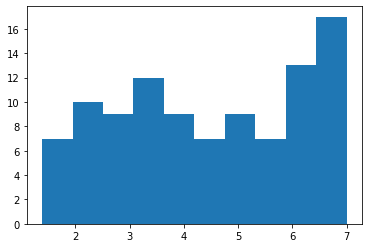

In [4]:
#Creating the histogram
plt.hist(eng_data['MEAN'])

(array([12., 12.,  7.,  5.,  5.,  3., 10.,  9., 20., 17.]),
 array([1.78, 2.27, 2.76, 3.25, 3.74, 4.23, 4.72, 5.21, 5.7 , 6.19, 6.68]),
 <a list of 10 Patch objects>)

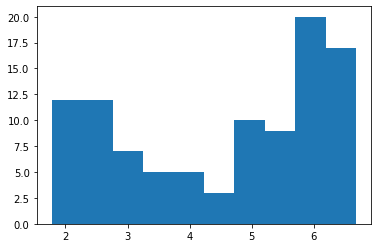

In [7]:
plt.hist(IT_data['MEAN'])

Question 2: Looking at the histogram of mean values for each of the language, first thing I noticed was it is not uniform. For both of the data higher the mean, we see higher the frequency. We can see for the histogram for italian data set that values are fluctuating more compared to english dataset.

(array([ 6., 12., 24., 27.,  8.,  9.,  3.,  6.,  3.,  2.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

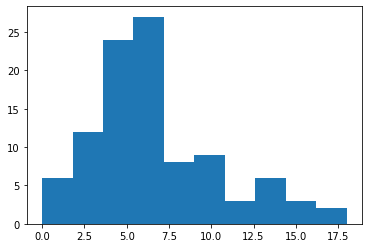

In [26]:
plt.hist(eng_data['INDEX'],bins=10)

(array([ 6., 20., 10., 25.,  7., 13.,  8.,  4.,  5.,  2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

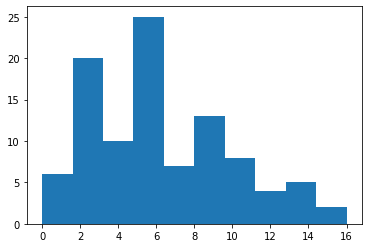

In [25]:
plt.hist(IT_data['INDEX'],bins=10)

Question 3: First thing I noticed about histogram of index values of word for english data is more or less uniform but it is right skewed. Histogram for italian data also seem to gave skewness but it is less apparent than english dataset. 

In [10]:
y1=eng_data['MEAN']
x1=eng_data['INDEX']
y2=IT_data['MEAN']
x2=IT_data['INDEX']


Text(0, 0.5, 'MEAN')

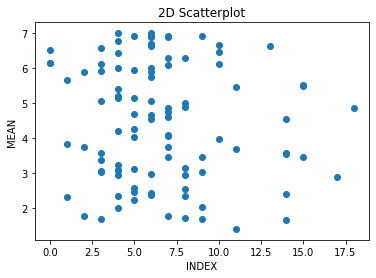

In [11]:
plt.scatter(x1,y1)
plt.title('2D Scatterplot')
plt.xlabel('INDEX')
plt.ylabel('MEAN')

Text(0, 0.5, 'MEAN')

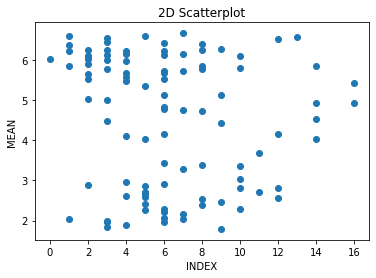

In [12]:
plt.scatter(x2,y2)
plt.title('2D Scatterplot')
plt.xlabel('INDEX')
plt.ylabel('MEAN')

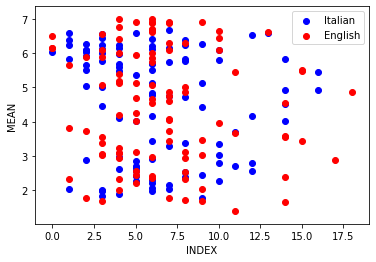

In [13]:
plt.scatter(x2,y2,color='blue',label='Italian')
plt.scatter(x1,y1,color='red',label='English')
plt.xlabel('INDEX')
plt.ylabel('MEAN')
plt.legend()


In [14]:
eng_data['Language']='English'


In [15]:
IT_data['Language']='Italian'

In [16]:
frames=[eng_data,IT_data]
df=pd.concat(frames)

In [17]:
x=df.iloc[:,[2,4]].values
y=df.iloc[:,-1].values

In [18]:
#Splitting dataset to train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [57]:
print(classifier.predict([[14,6.4]]))

['Italian']


Question 5: No the model is not predicting correctly. Accuracy rate is pretty low. I guess one thing is that variables we are using is not the best variables to make prediction. And also since we are using k=1, it does not look like an efficient way of make model work. Using just 1 for k value you are estimating your results based on a single sampl.As we can see in the scattered plot, points from both the classes are very closely scattered which leads to overfitting issue and chances of getting mispredictions are very high.    

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [65]:
print(classifier.predict([[14,6.4]]))

['Italian']


In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
print(classifier.predict([[14,6.4]]))

['Italian']


Question 6: Even after we change the k value, still we are getting the wrong prediction. I would say the variables we are using for this prediction is not the most appropriate ones and it does not have statistical significance towards the target variable. Either we can change the variables or add more to assure it has significance for model prediction. We can use different methods that allows us to check if the variables are impactful before we build model. 